In [1]:
suppressWarnings(library(BayesPrism))
library(tidyverse)


Loading required package: snowfall

Loading required package: snow

Loading required package: NMF

Loading required package: registry

Loading required package: rngtools

Loading required package: cluster

NMF - BioConductor layer [OK] | Shared memory capabilities [NO: bigmemory] | Cores 2/2

  To enable shared memory capabilities, try: install.extras('
NMF
')

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::combine()    masks Biobase::combine(), BiocGenerics::combine()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()
✖ ggplot2::Position() masks Bioc

In [2]:

SC.eset <- readRDS('/lustre/scratch126/cellgen/team205/rl20/Gut/scData/Epi_Small_Intestine_pooled_disease_only_ped_adult_CD_celiac_inflammed.plus_additional_epi_down200_per_ctype_ExpressionSet.rds')
SC.eset

ExpressionSet (storageMode: lockedEnvironment)
assayData: 18485 features, 11635 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: AGGTCATGTGCACCAC-GSM3972028
    CCCTCCTGTGTAATGA-4918STDY7982703 ...
    GTTTCTATCCTTCAAT-4918STDY7901096 (11635 total)
  varLabels: donorID_unified study ... modi_2_annot (7 total)
  varMetadata: labelDescription
featureData: none
experimentData: use 'experimentData(object)'
Annotation:  

In [3]:
phenoData(SC.eset)

An object of class 'AnnotatedDataFrame'
  sampleNames: AGGTCATGTGCACCAC-GSM3972028
    CCCTCCTGTGTAATGA-4918STDY7982703 ...
    GTTTCTATCCTTCAAT-4918STDY7901096 (11635 total)
  varLabels: donorID_unified study ... modi_2_annot (7 total)
  varMetadata: labelDescription

In [4]:
#phenoData(SC.eset)$modi_2_annot %>% table

In [5]:
sc.dat <- as.matrix(exprs(SC.eset)) %>% t()
dim(sc.dat)

[1] 11635 18485

In [6]:
#Bulk.eset <- readRDS('/lustre/scratch126/cellgen/team205/rl20/Gut/E_MTAB_5464_ExpressionSet.rds')
#Bulk.eset <- readRDS('/home/jovyan/farm/Gut/Deconvolution/GSE111889_ExpressionSet.rds')
#Bulk.eset <- readRDS('/home/jovyan/farm/Gut/Deconvolution/COAD_TCGAbiolinks_ExpressionSet.rds')
#Bulk.eset <- readRDS('/home/jovyan/farm/Gut/Deconvolution/E_CEOD_101794/E_CEOD_101794_ExpressionSet.rds')
#Bulk.eset <- readRDS('/home/jovyan/farm/Gut/Deconvolution/Celiac_GSE131705/Celiac_GSE131705_ExpressionSet.rds')
#Bulk.eset <- readRDS('/home/jovyan/farm/Gut/Deconvolution/Celiac_GSE145358/GSE145358_Celiac_ExpressionSet.rds')
Bulk.eset <- readRDS('/home/jovyan/farm/Gut/Deconvolution/GSE126299/GSE126299_ExpressionSet.rds')
Bulk.eset

ExpressionSet (storageMode: lockedEnvironment)
assayData: 34607 features, 24 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: 19B 17B ... 24B (24 total)
  varLabels: condition location sample_info
  varMetadata: labelDescription
featureData
  featureNames: MIR1302-2HG FAM138A ... AC213203.1 (34607 total)
  fvarLabels: gene_name
  fvarMetadata: labelDescription
experimentData: use 'experimentData(object)'
Annotation:  

In [7]:
bk.dat <- t(as.matrix(exprs(Bulk.eset)))
dim(bk.dat)

[1]    24 34607

In [8]:
#cell.type.labels <- as.vector(phenoData(SC.eset)$modi_2_annot)
cell.type.labels <- as.vector(phenoData(SC.eset)$level_3_annot)
cell.state.labels <- as.vector(phenoData(SC.eset)$level_3_annot)
#cell.type.labels <- as.vector(phenoData(SC.eset)$anno)
#cell.state.labels <- as.vector(phenoData(SC.eset)$anno)

In [9]:
#plot.cor.phi (input=sc.dat,
#                         input.labels=cell.state.labels,
#                         title="cell state correlation",
                         #specify pdf.prefix if need to output to pdf
                         #pdf.prefix="gbm.cor.cs", 
#                         cexRow=0.2, cexCol=0.2,
#                         margins=c(2,2))

### Filter outlier genes

Gene symbols detected. Recommend to use EMSEMBLE IDs for more unique mapping.


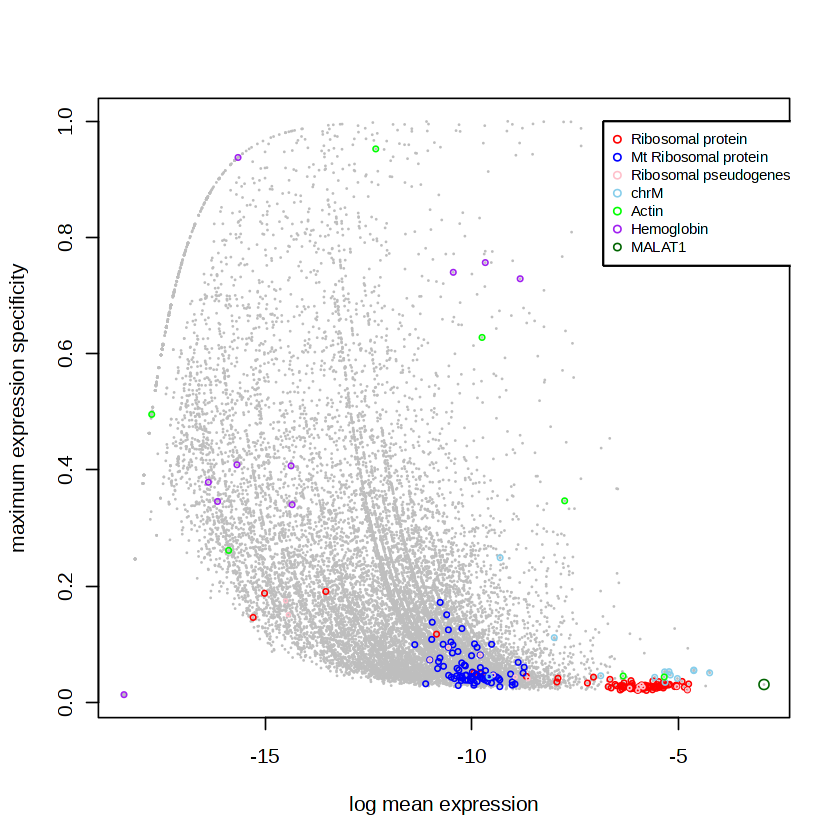

In [10]:
sc.stat <- plot.scRNA.outlier(
  input=sc.dat, #make sure the colnames are gene symbol or ENSMEBL ID 
  cell.type.labels=cell.type.labels,
  species="hs", #currently only human(hs) and mouse(mm) annotations are supported
  return.raw=TRUE #return the data used for plotting. 
  #pdf.prefix="gbm.sc.stat" specify pdf.prefix if need to output to pdf
)
#> EMSEMBLE IDs detected.


In [11]:
head(sc.stat)  

,exp.mean.log,max.spec,other_Rb,chrM,chrX,chrY,Rb,Mrp,act,hb,MALAT1
,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
AL627309.1,-14.60020,0.15780658,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FAM87B,-16.42795,0.26849215,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
LINC00115,-13.50953,0.07706493,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FAM41C,-12.07941,0.21300584,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
SAMD11,-11.49957,0.24083209,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
NOC2L,-10.42199,0.05396859,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


Gene symbols detected. Recommend to use EMSEMBLE IDs for more unique mapping.


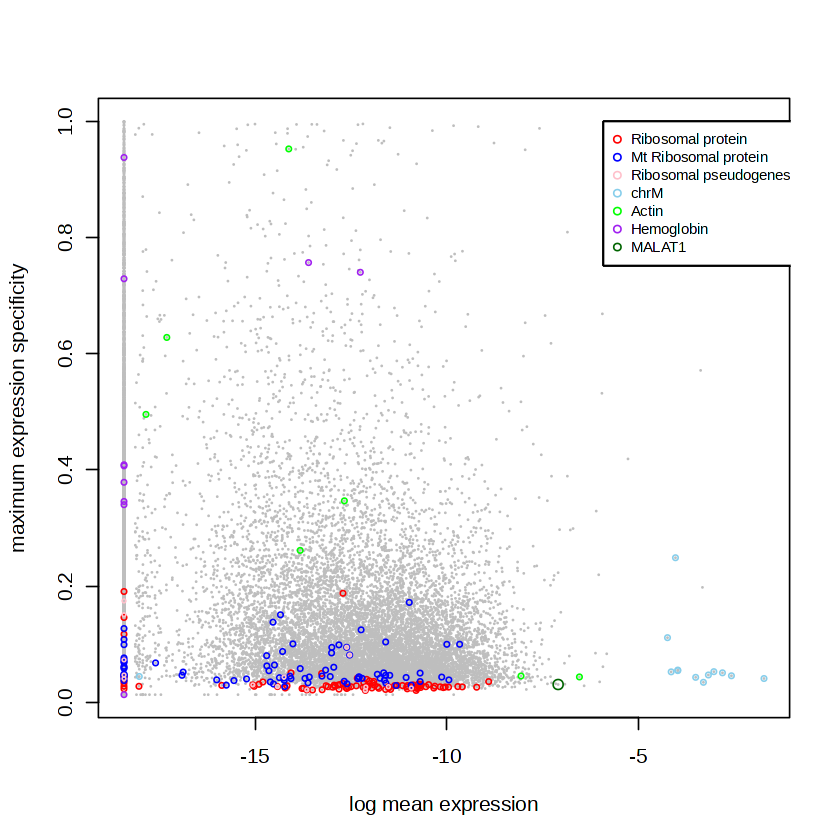

In [12]:
bk.stat <- plot.bulk.outlier(
  bulk.input=bk.dat,#make sure the colnames are gene symbol or ENSMEBL ID 
    sc.input=sc.dat, #make sure the colnames are gene symbol or ENSMEBL ID 
  cell.type.labels=cell.type.labels,
  species="hs", #currently only human(hs) and mouse(mm) annotations are supported
  return.raw=TRUE
  #pdf.prefix="gbm.bk.stat" specify pdf.prefix if need to output to pdf
)
#> EMSEMBLE IDs detected. ### when raw counts are not available, linear normalizarion, such as TPM, FPKM is ok

In [13]:
head(bk.stat)

,exp.mean.log,max.spec,other_Rb,chrM,chrX,chrY,Rb,Mrp,act,hb,MALAT1
,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
MIR1302-2HG,-18.42068,NA,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FAM138A,-18.42068,NA,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
OR4F5,-18.42068,NA,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
AL627309.1,-18.42068,0.1578066,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
AL627309.3,-18.42068,NA,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
AL627309.2,-18.42068,NA,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


In [14]:
sc.dat.filtered <- cleanup.genes (input=sc.dat,
                                  input.type="count.matrix",
                                    species="hs", 
                                    gene.group=c( "Rb","Mrp","other_Rb","chrM","MALAT1","chrX","chrY") ,
                                    exp.cells=5)

Gene symbols detected. Recommend to use EMSEMBLE IDs for more unique mapping.
number of genes filtered in each category: 
      Rb      Mrp other_Rb     chrM   MALAT1     chrX     chrY 
      89       77       15       13        1      691       45 
A total of  891  genes from Rb Mrp other_Rb chrM MALAT1 chrX chrY  have been excluded 
A total of  2182  gene expressed in fewer than  5  cells have been excluded 


In [15]:
dim(sc.dat.filtered)

[1] 11635 15412

Gene symbols detected. Recommend to use EMSEMBLE IDs for more unique mapping.


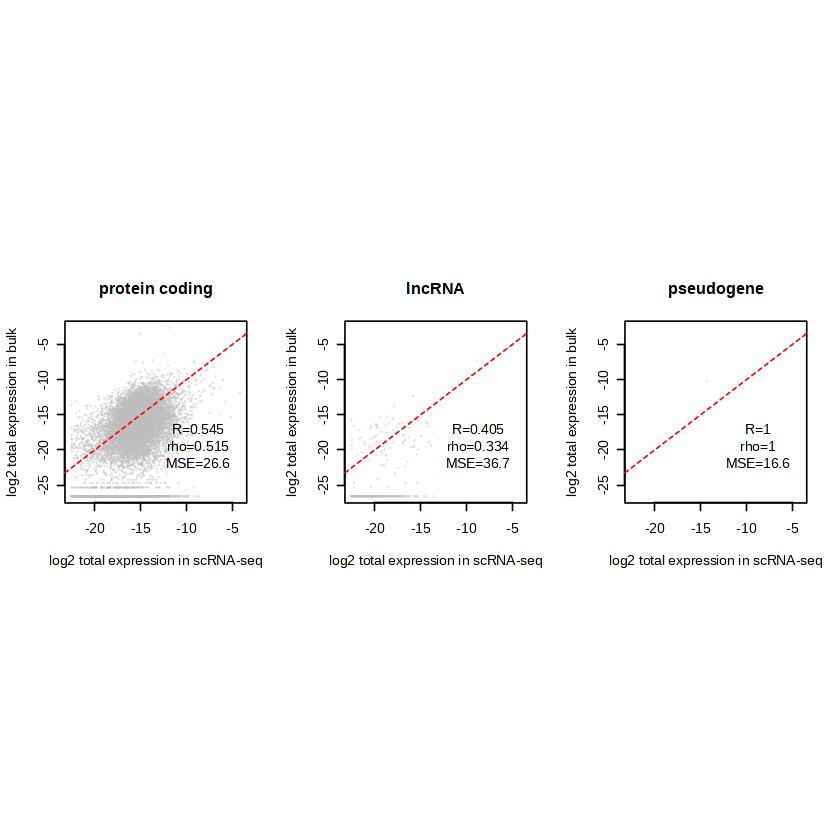

In [16]:
#note this function only works for human data. For other species, you are advised to make plots by yourself.
plot.bulk.vs.sc (sc.input = sc.dat.filtered,
                            bulk.input = bk.dat
                            #pdf.prefix="gbm.bk.vs.sc" specify pdf.prefix if need to output to pdf
)

In [17]:
sc.dat.filtered.pc <-  select.gene.type (sc.dat.filtered,
                                        gene.type = "protein_coding")

Gene symbols detected. Recommend to use EMSEMBLE IDs for more unique mapping.
number of genes retained in each category: 

protein_coding 
         14601 


In [18]:

# Select marker genes (Optional)
# performing pair-wise t test for cell states from different cell types 
# seems to perform better

diff.exp.stat <- get.exp.stat(sc.dat=sc.dat[,colSums(sc.dat>0)>3],# filter genes to reduce memory use
                                          cell.type.labels=cell.type.labels,
                                          cell.state.labels=cell.state.labels,
                                          psuedo.count=0.1, #a numeric value used for log2 transformation. =0.1 for 10x data, =10 for smart-seq. Default=0.1.
                                          cell.count.cutoff=50, # a numeric value to exclude cell state with number of cells fewer than this value for t test. Default=50.
                                          n.cores=20 #number of threads
                                          )

In [19]:
sc.dat.filtered.pc.sig <- select.marker (sc.dat=sc.dat.filtered.pc,
                                                  stat=diff.exp.stat,
                                                  pval.max=0.05,
                                                  lfc.min=0.1)

number of markers selected for each cell type: 
Trm_Th17 :  6 
Trm/em_CD8 :  8 
Tfh_naive :  2 
B_plasma_IgA1 :  5 
TA :  0 
Enterocyte :  38 
ILC3 :  26 
Treg_IL10 :  6 
Goblet_progenitor :  9 
Monocyte :  46 
B_memory :  0 
Enteroendocrine :  102 
Trm_CD4 :  0 
T/NK_cycling :  82 
Trm_CD8 :  1 
B_plasma_IgG :  8 
B_naive :  8 
Lamina_propria_fibroblast_ADAMDEC1 :  49 
EC_capillary :  64 
NK_CD16 :  33 
Goblet :  21 
Myofibroblast :  109 
EC_venous :  35 
Tnaive/cm_CD4 :  1 
Goblet_cycling :  17 
Tfh :  11 
DC_cDC2 :  29 
Oral_mucosa_fibroblast :  167 
Macrophage :  26 
Mucous_gland_neck :  51 
gdT :  23 
Epithelial_stem :  13 
B_plasma_IgM :  5 
Tnaive/cm_CD8 :  16 
MAIT :  9 
B_plasmablast :  82 
Treg :  2 
Crypt_fibroblast_PI16 :  34 
EC_lymphatic :  121 
Paneth :  15 
B_GC_II :  43 
Pericyte :  77 
EC_arterial_1 :  56 
Tuft :  109 
gdT_naive :  0 
Villus_fibroblast_F3 :  88 
Macrophage_TREM2 :  65 
NK_CD56bright :  15 
B_GC_I :  217 
BEST4_enterocyte_colonocyte :  36 
DC_cDC1 :  6

In [20]:
dim(sc.dat.filtered.pc.sig)
#dim(sc.dat.filtered.pc)

[1] 11635  3672

#### Construct a prism object

In [21]:
myPrism <- new.prism(
  reference=sc.dat.filtered.pc.sig, ### sc.dat.filtered.pc
  mixture=bk.dat,
  input.type="count.matrix", 
  cell.type.labels = cell.type.labels, 
  cell.state.labels = cell.state.labels,
  key=NULL,
  outlier.cut=0.01,
    outlier.fraction=0.1,
)

number of cells in each cell state 
cell.state.labels
                        EC_cycling                Eosinophil/basophil 
                                 2                                  2 
             Oesophagus_fibroblast                       Erythrocytes 
                                 2                                  4 
        Immune_recruiting_pericyte                            Glial_1 
                                 5                                  6 
                        Neuroblast                  Rectum_fibroblast 
                                 8                                 11 
                     DC_langerhans                      Follicular_DC 
                                17                                 17 
                  Macrophage_LYVE1                    Macrophage_MMP9 
                                19                                 45 
                     EC_arterial_1                            Glial_2 
                       

In [22]:
bp.res <- run.prism(prism = myPrism, n.cores=50)

Run Gibbs sampling... 
Current time:  2023-12-16 13:57:25 
Estimated time to complete:  3mins 
Estimated finishing time:  2023-12-16 13:59:50 
Start run... 
R Version:  R version 4.0.4 (2021-02-15) 



snowfall 1.84-6.2 initialized (using snow 0.4-4): parallel execution on 50 CPUs.



Stopping cluster




Update the reference matrix ... 


snowfall 1.84-6.2 initialized (using snow 0.4-4): parallel execution on 50 CPUs.



Stopping cluster




Run Gibbs sampling using updated reference ... 
Current time:  2023-12-16 14:01:17 
Estimated time to complete:  2mins 
Estimated finishing time:  2023-12-16 14:02:42 
Start run... 


snowfall 1.84-6.2 initialized (using snow 0.4-4): parallel execution on 50 CPUs.



Stopping cluster




In [23]:
#bp.res

In [24]:
slotNames(bp.res)

[1] "prism"                       "posterior.initial.cellState"
[3] "posterior.initial.cellType"  "reference.update"           
[5] "posterior.theta_f"           "control_param"

In [25]:
# extract posterior mean of cell type fraction theta
theta <- get.fraction(bp=bp.res,
            which.theta="final",
            state.or.type="type")

head(theta)

,Trm_Th17,Trm/em_CD8,Tfh_naive,B_plasma_IgA1,TA,Enterocyte,ILC3,Treg_IL10,Goblet_progenitor,Monocyte,⋯,Glial_2,Neuroblast,Macrophage_LYVE1,DC_langerhans,Glial_1,Oesophagus_fibroblast,Immune_recruiting_pericyte,Rectum_fibroblast,EC_cycling,Erythrocytes
19B,2.636064e-06,2.768950e-06,2.743298e-06,2.352621e-06,2.615023e-02,4.711588e-01,2.629649e-06,2.729326e-06,5.622556e-06,2.300472e-06,⋯,2.569809e-06,6.373103e-02,4.198936e-02,5.774479e-06,2.011889e-06,1.618811e-06,2.703890e-06,8.702877e-04,2.923750e-06,1.781319e-06
17B,2.058398e-06,2.234089e-06,1.870911e-06,2.503708e-06,3.510870e-06,7.134312e-01,1.883167e-06,1.838304e-06,2.872430e-06,2.759597e-06,⋯,2.733957e-06,3.805882e-02,4.189876e-02,4.386599e-06,2.091133e-06,2.203290e-06,1.961839e-06,1.200963e-02,2.296174e-06,2.036751e-06
18B,5.102067e-06,5.823848e-06,5.058402e-06,9.060539e-06,2.554256e-05,7.790293e-01,5.496269e-06,5.775426e-06,3.162993e-05,7.674591e-06,⋯,4.072373e-06,4.280489e-06,2.127957e-03,3.631935e-03,2.556144e-06,2.572786e-06,7.599393e-06,3.850150e-06,5.542843e-06,2.797084e-06
4A,3.702786e-06,3.822816e-06,3.448380e-06,3.589912e-06,4.372473e-06,4.387943e-06,3.530519e-06,3.704616e-06,3.497992e-01,4.231418e-06,⋯,3.975555e-06,3.947252e-06,5.026586e-06,4.766372e-06,3.428036e-06,3.126927e-06,4.422798e-06,2.861521e-05,3.969635e-06,4.218381e-06
23B,1.293669e-06,1.799734e-06,1.335922e-06,1.503461e-06,5.375071e-06,6.960577e-01,1.425869e-06,1.559677e-06,2.106671e-03,1.815987e-06,⋯,1.737878e-06,1.942912e-06,1.585058e-03,1.492480e-06,1.415263e-06,1.207071e-06,1.820758e-06,3.958291e-06,1.867082e-06,1.379534e-06
8B,2.964937e-06,2.494739e-06,2.822750e-06,4.502328e-06,5.096622e-06,7.509967e-01,2.434917e-06,2.617111e-06,1.784971e-03,1.833795e-06,⋯,3.195400e-06,1.694171e-05,2.898672e-06,2.462136e-06,1.794699e-06,1.842735e-06,2.966989e-06,6.802461e-03,2.416568e-06,2.952159e-06


In [26]:
save(bp.res, file="/lustre/scratch126/cellgen/team205/rl20/Gut/BayesPrism_out/GSE126299_LCM_fine_grained_annot_disease_only_new_sc_ref.rdata")

In [28]:
library(tidyverse)
library(ggbeeswarm)
library(ggplot2)
library(reshape2)
library(SingleCellExperiment)

In [29]:
load("/lustre/scratch126/cellgen/team205/rl20/Gut/BayesPrism_out/GSE126299_LCM_fine_grained_annot_disease_only_new_sc_ref.rdata")

In [30]:
# extract posterior mean of cell type fraction theta
theta <- get.fraction(bp=bp.res,
            which.theta="final",
            state.or.type="type")

head(theta)

,Trm_Th17,Trm/em_CD8,Tfh_naive,B_plasma_IgA1,TA,Enterocyte,ILC3,Treg_IL10,Goblet_progenitor,Monocyte,⋯,Glial_2,Neuroblast,Macrophage_LYVE1,DC_langerhans,Glial_1,Oesophagus_fibroblast,Immune_recruiting_pericyte,Rectum_fibroblast,EC_cycling,Erythrocytes
19B,2.636064e-06,2.768950e-06,2.743298e-06,2.352621e-06,2.615023e-02,4.711588e-01,2.629649e-06,2.729326e-06,5.622556e-06,2.300472e-06,⋯,2.569809e-06,6.373103e-02,4.198936e-02,5.774479e-06,2.011889e-06,1.618811e-06,2.703890e-06,8.702877e-04,2.923750e-06,1.781319e-06
17B,2.058398e-06,2.234089e-06,1.870911e-06,2.503708e-06,3.510870e-06,7.134312e-01,1.883167e-06,1.838304e-06,2.872430e-06,2.759597e-06,⋯,2.733957e-06,3.805882e-02,4.189876e-02,4.386599e-06,2.091133e-06,2.203290e-06,1.961839e-06,1.200963e-02,2.296174e-06,2.036751e-06
18B,5.102067e-06,5.823848e-06,5.058402e-06,9.060539e-06,2.554256e-05,7.790293e-01,5.496269e-06,5.775426e-06,3.162993e-05,7.674591e-06,⋯,4.072373e-06,4.280489e-06,2.127957e-03,3.631935e-03,2.556144e-06,2.572786e-06,7.599393e-06,3.850150e-06,5.542843e-06,2.797084e-06
4A,3.702786e-06,3.822816e-06,3.448380e-06,3.589912e-06,4.372473e-06,4.387943e-06,3.530519e-06,3.704616e-06,3.497992e-01,4.231418e-06,⋯,3.975555e-06,3.947252e-06,5.026586e-06,4.766372e-06,3.428036e-06,3.126927e-06,4.422798e-06,2.861521e-05,3.969635e-06,4.218381e-06
23B,1.293669e-06,1.799734e-06,1.335922e-06,1.503461e-06,5.375071e-06,6.960577e-01,1.425869e-06,1.559677e-06,2.106671e-03,1.815987e-06,⋯,1.737878e-06,1.942912e-06,1.585058e-03,1.492480e-06,1.415263e-06,1.207071e-06,1.820758e-06,3.958291e-06,1.867082e-06,1.379534e-06
8B,2.964937e-06,2.494739e-06,2.822750e-06,4.502328e-06,5.096622e-06,7.509967e-01,2.434917e-06,2.617111e-06,1.784971e-03,1.833795e-06,⋯,3.195400e-06,1.694171e-05,2.898672e-06,2.462136e-06,1.794699e-06,1.842735e-06,2.966989e-06,6.802461e-03,2.416568e-06,2.952159e-06


In [31]:
Bulk.eset <- readRDS('/home/jovyan/farm/Gut/Deconvolution/GSE126299/GSE126299_ExpressionSet.rds')

In [32]:
Bulk.eset

ExpressionSet (storageMode: lockedEnvironment)
assayData: 34607 features, 24 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: 19B 17B ... 24B (24 total)
  varLabels: condition location sample_info
  varMetadata: labelDescription
featureData
  featureNames: MIR1302-2HG FAM138A ... AC213203.1 (34607 total)
  fvarLabels: gene_name
  fvarMetadata: labelDescription
experimentData: use 'experimentData(object)'
Annotation:  

In [44]:
phenoData(Bulk.eset)$sample_info %>% table

.
             CD_non-UACL_Intestinal epithelium monlayer 
                                                     11 
                 CD_UACL_Intestinal epithelium monlayer 
                                                      6 
healthy control_non-UACL_Intestinal epithelium monlayer 
                                                      7 

In [47]:
prop1_df <- data.frame(theta, check.names=F)
prop1_df$sample_type <- phenoData(Bulk.eset)$condition
prop1_df$location <- phenoData(Bulk.eset)$location
prop1_df$sample_info <- phenoData(Bulk.eset)$sample_info
prop1_df$sample_type <- factor(prop1_df$sample_type, levels = c("noninflamed", "inflamed"))
prop1_df$sample_info <- factor(prop1_df$sample_info, levels = c('healthy control_non-UACL_Intestinal epithelium monlayer',
                                                                'CD_non-UACL_Intestinal epithelium monlayer',
                                                                'CD_UACL_Intestinal epithelium monlayer'))
prop1_df$samp_loc <- paste(prop1_df$sample_type, prop1_df$location, sep="_")
#prop1_df$Condition_Diet <- paste(prop1_df$sample_type, prop1_df$diet,
#                                      sep="_")
prop1_df$sample_id <- rownames(prop1_df)
prop1_df1 <-  melt(prop1_df,value.name = "proportion")

Using sample_type, location, sample_info, samp_loc, sample_id as id variables



In [51]:
write.csv(prop1_df, file = 'deconv_proportion_level3_GSE126299_new_sc_ref.csv',quote=F)

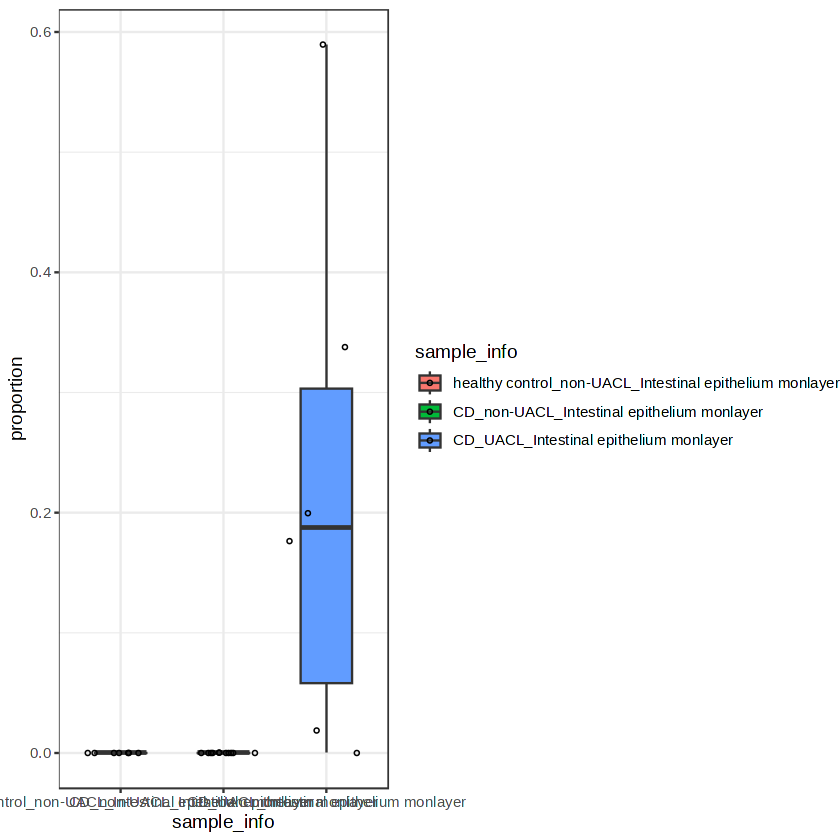

In [48]:
prop1_df2 <- prop1_df1[which(prop1_df1$variable == "Mucous_gland_neck"), ]

ggplot(data = prop1_df2, aes(x = sample_info, y = proportion, fill = sample_info))+
  geom_boxplot(aes(group=sample_info), width=0.5, outlier.colour = "white", outlier.size = 0.5)+
  #geom_point(position=position_jitter(width = 0.05,height = 0),alpha=0.8,shape=19, color = 'grey60', size = 1)+
  geom_quasirandom(method = "pseudorandom", dodge.width=0.5, size=0.8, shape=1, alpha=1) +
  #scale_fill_manual(values = c("#E07469","#97B2DD","grey")) +
theme_bw()
ggsave("GSE126299_deconv_new_sc_ref.2.pdf", width = 9, height = 5)

In [43]:
c1 <- prop1_df2$proportion[which(prop1_df2$sample_type == "noninflamed")]
c2 <- prop1_df2$proportion[which(prop1_df2$sample_type == "inflamed")]
wilcox.test(c1, c2)


	Wilcoxon rank sum exact test

data:  c1 and c2
W = 60, p-value = 0.5309
alternative hypothesis: true location shift is not equal to 0


In [27]:
load("/lustre/scratch126/cellgen/team205/rl20/Gut/BayesPrism_out/GSE145358_Celiac_fine_grained_annot_disease_only_new_sc_ref.rdata")

In [28]:
# extract posterior mean of cell type fraction theta
theta <- get.fraction(bp=bp.res,
            which.theta="final",
            state.or.type="type")

head(theta)

,Trm_Th17,Trm/em_CD8,Tfh_naive,B_plasma_IgA1,TA,Enterocyte,ILC3,Treg_IL10,Goblet_progenitor,Monocyte,⋯,Glial_2,Neuroblast,Macrophage_LYVE1,DC_langerhans,Glial_1,Oesophagus_fibroblast,Immune_recruiting_pericyte,Rectum_fibroblast,EC_cycling,Erythrocytes
101-002BL,0.0007509337,0.0003031600,0.0004923066,1.256246e-04,0.0003280171,0.6305525,0.0006284402,0.0002783868,9.346328e-05,0.0002550163,⋯,0.0011579429,0.0003707620,0.003828429,0.0002658645,0.0003884187,0.0004364146,0.0001327427,0.0004920046,0.0002786240,1.399690e-04
101-002EOS,0.0008860073,0.0008372545,0.0009792220,4.758829e-04,0.0740451694,0.3846270,0.0006777480,0.0005679089,1.999625e-04,0.0003025518,⋯,0.0006316272,0.0019285405,0.005238808,0.0018637983,0.0058509868,0.0004379715,0.0006388440,0.0008018766,0.0002112791,2.180791e-04
101-019BL,0.0008987944,0.0001752258,0.0001198903,9.961683e-05,0.0004002494,0.4276456,0.0047206736,0.0002000505,1.822284e-04,0.0001292358,⋯,0.0013593154,0.0103957385,0.004197311,0.0001586479,0.0005441933,0.0001984329,0.0003327178,0.0001659565,0.0003883032,1.282061e-04
101-019EOS,0.0003858349,0.0030808203,0.0006935565,2.331486e-04,0.0728562786,0.3948888,0.0004450275,0.0002805977,1.312369e-04,0.0003758304,⋯,0.0139040707,0.0006729405,0.003211641,0.0001619139,0.0013404097,0.0006313976,0.0003897168,0.0004386831,0.0001753408,1.015882e-04
101-023BL,0.0006110347,0.0006178411,0.0004500696,1.062416e-04,0.0145063324,0.3665634,0.0007293706,0.0009235020,3.671761e-04,0.0004447890,⋯,0.0014249532,0.0053511665,0.003185108,0.0003967562,0.0021573854,0.0002328209,0.0004608130,0.0021576124,0.0001913431,7.244137e-05
101-023EOS,0.0002753904,0.0002767467,0.0002487749,2.090869e-04,0.0875987480,0.2569835,0.0002081057,0.0001496641,1.835527e-03,0.0001446367,⋯,0.0003896208,0.0018492709,0.003305324,0.0001328000,0.0046848191,0.0013154027,0.0001893197,0.0003313187,0.0002222701,2.824831e-04


In [29]:
Bulk.eset <- readRDS('/home/jovyan/farm/Gut/Deconvolution/Celiac_GSE145358/GSE145358_Celiac_ExpressionSet.rds')

In [30]:
phenoData(Bulk.eset)$condition %>% table

.
coeliac healthy 
     30       6 

In [31]:
#Bulk.eset <- readRDS('/home/jovyan/farm/Gut/Deconvolution/Celiac_GSE131705/GSE131705_Celiac_ExpressionSet.rds')

prop1_df <- data.frame(theta, check.names=F)
prop1_df$sample_type <- phenoData(Bulk.eset)$condition
prop1_df$location <- phenoData(Bulk.eset)$location
prop1_df$diet <- phenoData(Bulk.eset)$diet
prop1_df$sample_type <- factor(prop1_df$sample_type, levels = c("healthy", "coeliac"))
prop1_df$samp_loc <- paste(prop1_df$sample_type, prop1_df$location, sep="_")
prop1_df$Condition_Diet <- paste(prop1_df$sample_type, prop1_df$diet,
                                      sep="_")
prop1_df$sample_id <- rownames(prop1_df)
prop1_df1 <-  melt(prop1_df,value.name = "proportion")


Using sample_type, location, diet, samp_loc, Condition_Diet, sample_id as id variables



In [32]:
head(prop1_df1)

,sample_type,location,diet,samp_loc,Condition_Diet,sample_id,variable,proportion
,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>,<dbl>
1,coeliac,duodenum,gluten_free,coeliac_duodenum,coeliac_gluten_free,101-002BL,Trm_Th17,0.0007509337
2,coeliac,duodenum,post_gluten_challenge,coeliac_duodenum,coeliac_post_gluten_challenge,101-002EOS,Trm_Th17,0.0008860073
3,coeliac,duodenum,gluten_free,coeliac_duodenum,coeliac_gluten_free,101-019BL,Trm_Th17,0.0008987944
4,coeliac,duodenum,post_gluten_challenge,coeliac_duodenum,coeliac_post_gluten_challenge,101-019EOS,Trm_Th17,0.0003858349
5,coeliac,duodenum,gluten_free,coeliac_duodenum,coeliac_gluten_free,101-023BL,Trm_Th17,0.0006110347
6,coeliac,duodenum,post_gluten_challenge,coeliac_duodenum,coeliac_post_gluten_challenge,101-023EOS,Trm_Th17,0.0002753904


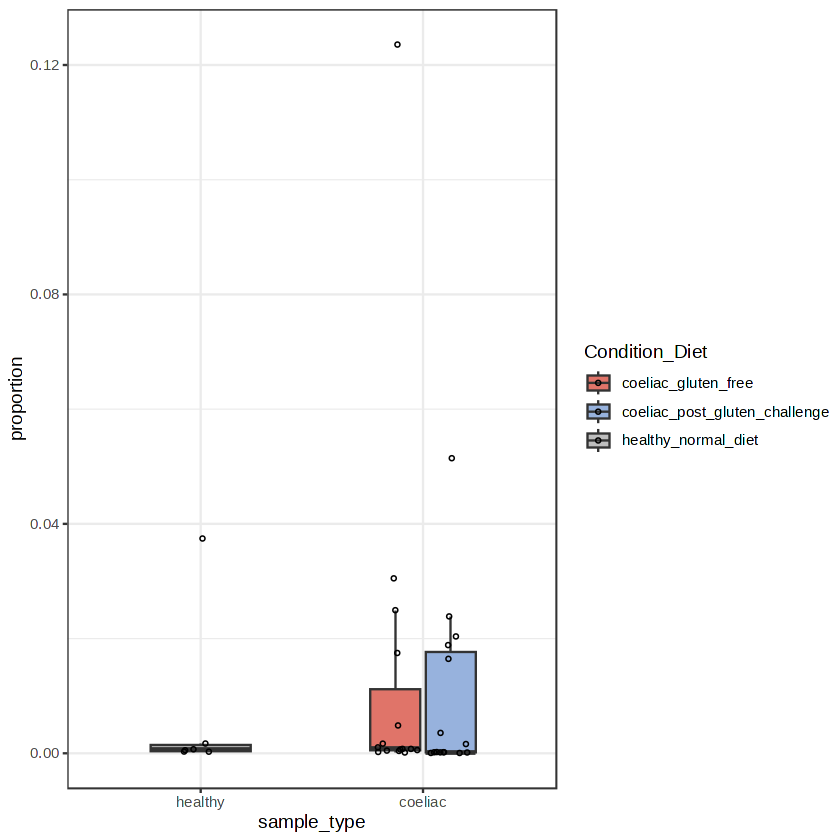

In [34]:
prop1_df2 <- prop1_df1[which(prop1_df1$variable == "Mucous_gland_neck"), ]

ggplot(data = prop1_df2, aes(x = sample_type, y = proportion, fill = Condition_Diet))+
  geom_boxplot(aes(group=Condition_Diet), width=0.5, outlier.colour = "white", outlier.size = 0.5)+
  #geom_point(position=position_jitter(width = 0.05,height = 0),alpha=0.8,shape=19, color = 'grey60', size = 1)+
  geom_quasirandom(method = "pseudorandom", dodge.width=0.5, size=0.8, shape=1, alpha=1) +
  scale_fill_manual(values = c("#E07469","#97B2DD","grey")) +
theme_bw()
ggsave("GSE145358_deconv_new_sc_ref.pdf", width = 6, height = 5)

In [32]:
c1 <- prop1_df2$proportion[which(prop1_df2$Condition_Diet == "coeliac_post_gluten_challenge")]
c2 <- prop1_df2$proportion[which(prop1_df2$Condition_Diet == "healthy_normal_diet")]
wilcox.test(c1, c2)


	Wilcoxon rank sum exact test

data:  c1 and c2
W = 52, p-value = 0.6222
alternative hypothesis: true location shift is not equal to 0


In [31]:
prop1_df <- data.frame(theta, check.names=F)
prop1_df$sample_type <- phenoData(Bulk.eset)$condition
prop1_df$location <- phenoData(Bulk.eset)$location
prop1_df$sample_type <- factor(prop1_df$sample_type, levels = c("control", "celiac"))
prop1_df$samp_loc <- paste(prop1_df$sample_type, prop1_df$location, sep="_")
prop1_df$sample_id <- rownames(prop1_df)
prop1_df1 <-  melt(prop1_df,value.name = "proportion")

Using sample_type, location, samp_loc, sample_id as id variables



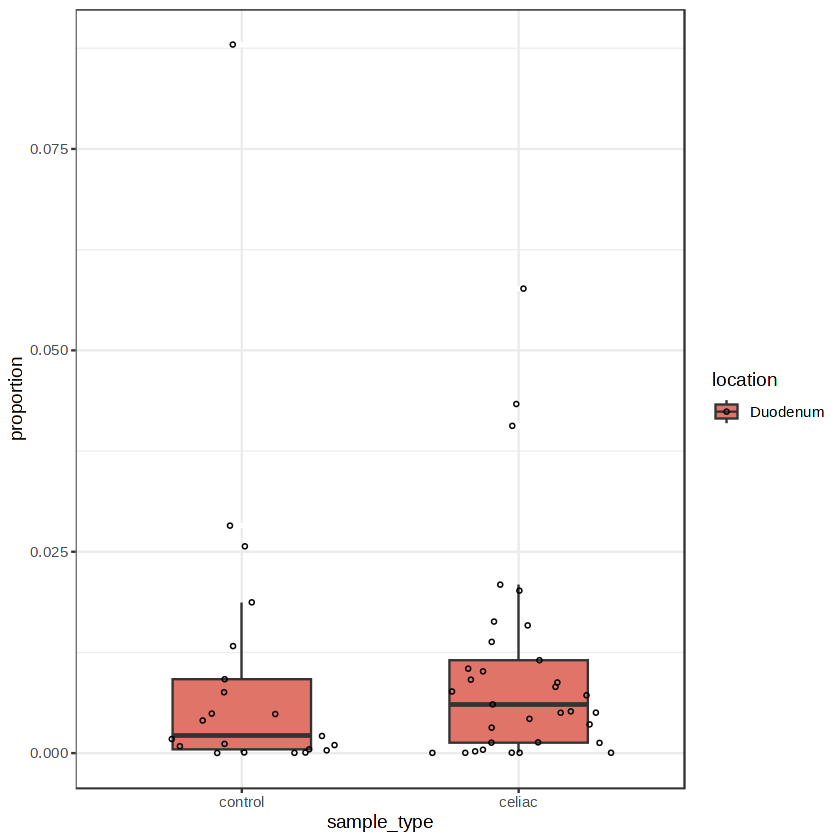

In [34]:
prop1_df2 <- prop1_df1[which(prop1_df1$variable == "Mucous_gland_neck"), ]

ggplot(data = prop1_df2, aes(x = sample_type, y = proportion, fill = location))+
  geom_boxplot(aes(group=samp_loc), width=0.5, outlier.colour = "white", outlier.size = 0.5)+
  #geom_point(position=position_jitter(width = 0.05,height = 0),alpha=0.8,shape=19, color = 'grey60', size = 1)+
  geom_quasirandom(method = "pseudorandom", dodge.width=0.5, size=0.8, shape=1, alpha=1) +
  scale_fill_manual(values = c("#E07469","#97B2DD","grey")) +
theme_bw()
ggsave("GSE131705_deconv.pdf", width = 6, height = 5)

In [33]:
c1 <- prop1_df2$proportion[which(prop1_df2$sample_type == "control")]
c2 <- prop1_df2$proportion[which(prop1_df2$sample_type == "celiac")]
wilcox.test(c1, c2)


	Wilcoxon rank sum exact test

data:  c1 and c2
W = 289, p-value = 0.3147
alternative hypothesis: true location shift is not equal to 0


In [27]:
library(tidyverse)
library(ggbeeswarm)
library(ggplot2)
library(reshape2)
library(SingleCellExperiment)

In [68]:
load("/lustre/scratch126/cellgen/team205/rl20/Gut/BayesPrism_out/E_MTAB_5464_fine_grained_annot_disease_only_new_sc_ref_allgene.rdata")


In [69]:
# extract posterior mean of cell type fraction theta
theta <- get.fraction(bp=bp.res,
            which.theta="final",
            state.or.type="type")

head(theta)

,Trm_Th17,Trm/em_CD8,Tfh_naive,B_plasma_IgA1,TA,Enterocyte,ILC3,Treg_IL10,Goblet_progenitor,Monocyte,⋯,Glial_2,Neuroblast,Macrophage_LYVE1,DC_langerhans,Glial_1,Oesophagus_fibroblast,Immune_recruiting_pericyte,Rectum_fibroblast,EC_cycling,Erythrocytes
ERR2270963,2.878310e-06,5.215256e-06,8.755409e-06,1.682670e-05,7.966146e-03,1.279336e-06,2.196154e-03,7.039579e-06,3.324789e-06,2.599470e-06,⋯,4.317010e-06,1.062804e-03,0.016956237,4.509251e-06,0.003677431,1.652687e-04,9.022590e-06,3.286875e-06,1.239133e-05,1.625943e-06
ERR2270964,2.523476e-03,3.877807e-04,5.850449e-04,3.399065e-03,9.101852e-02,2.792155e-06,4.016001e-03,8.422771e-03,4.952867e-06,1.334462e-05,⋯,7.863224e-04,6.175518e-06,0.050639546,4.808683e-06,0.004868020,2.491834e-05,1.878400e-05,2.116527e-05,1.545764e-05,2.778910e-04
ERR2270965,9.440894e-05,5.559992e-04,9.187461e-04,1.330249e-02,4.122812e-02,1.753215e-06,4.500850e-03,1.803733e-03,3.549897e-05,2.389812e-06,⋯,1.051151e-05,5.365657e-05,0.031414906,5.013199e-06,0.004367939,2.590193e-05,1.907460e-05,1.883435e-03,5.329980e-06,2.345625e-06
ERR2270966,2.388992e-06,1.408800e-06,2.979817e-06,1.252028e-06,9.389930e-03,1.031800e-06,1.313486e-05,2.112259e-06,1.451029e-06,1.063919e-06,⋯,6.785584e-06,4.602781e-03,0.001521905,3.210810e-06,0.003905383,3.863813e-04,1.158018e-05,3.140706e-06,9.237813e-06,1.222962e-06
ERR2270967,3.286965e-06,2.788715e-06,5.709095e-06,3.790669e-06,4.524752e-03,2.730080e-06,3.112759e-03,1.838387e-06,1.112426e-06,1.149158e-06,⋯,4.261378e-06,1.290032e-03,0.006421501,3.337545e-06,0.003597820,2.513698e-04,1.940031e-04,3.951483e-06,6.496445e-05,1.111116e-06
ERR2270968,1.076870e-06,1.676014e-06,2.959793e-06,1.627370e-06,4.122475e-05,1.095174e-06,2.722449e-03,1.552945e-06,1.269042e-06,7.156095e-07,⋯,3.431655e-06,1.500867e-03,0.003611213,2.141912e-06,0.002564128,8.084682e-05,3.281634e-05,2.081053e-06,1.292238e-05,6.792213e-07


In [70]:
Bulk.eset <- readRDS('/lustre/scratch126/cellgen/team205/rl20/Gut/E_MTAB_5464_ExpressionSet.rds')

prop1_df <- data.frame(theta, check.names=F)
prop1_df$sample_type <- phenoData(Bulk.eset)$condition
prop1_df$location <- phenoData(Bulk.eset)$location
prop1_df$location[which(prop1_df$location=='ascending_colon' |
                          prop1_df$location=='sigmoid_colon')] <- 'Colon'
prop1_df$location[which(prop1_df$location=='terminal_ileum')] <- 'Ileum'
#prop1_df$location <- factor(prop1_df$location, levels=c('Ileum', 'Colon'))
prop1_df$samp_loc <- paste(prop1_df$sample_type, prop1_df$location, sep="_")
prop1_df$sample_type <- factor(prop1_df$sample_type, levels = c("normal", "CD", "UC"))
prop1_df$sample_id <- rownames(prop1_df)
prop1_df1 <-  melt(prop1_df,value.name = "proportion")

Using sample_type, location, samp_loc, sample_id as id variables



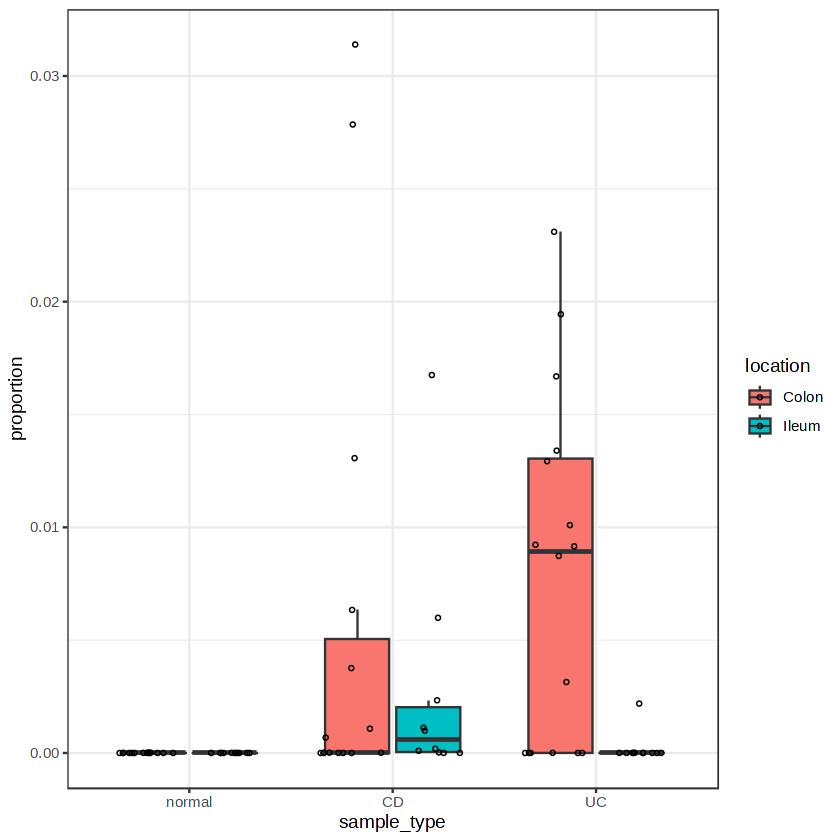

In [71]:
prop1_df2 <- prop1_df1[which(prop1_df1$variable == "Mucous_gland_neck"), ]
#prop1_df2 <- prop1_df1[which(prop1_df1$variable == "Epi MUC6+"), ]
ggplot(data=prop1_df2, aes(x=sample_type, y=proportion, fill=location))+
  geom_boxplot(aes(group=samp_loc), width=0.7, outlier.colour = "white", outlier.size = 0.5)+
  geom_quasirandom(method = "pseudorandom", dodge.width=0.8, size=0.8, shape=1, alpha=1) +
  #geom_text(x=1,y=0.3,label="Paneth")+
  #annotate("text",x=1,y=0.75,label = "VE ven",size=6)+
  #scale_fill_manual(values = c("#CDF2F9","#A6C6F8")) +
  #geom_boxplot(width=0.5,color="black",outlier.alpha = 0.4)+
  #geom_boxplot(notch=T, width=0.1, fill=NA, outlier.shape=NA, size=0.3) +
  #geom_point(aes(group=samp_loc),position=position_jitter(width = 0.1,height = 0),alpha=0.7,shape=19, color="grey60")+
  #geom_violin(width=2,color="black")+
  #geom_errorbar(data=bb, mapping = aes(x=tissue, y=mtb.median, ymin = mtb.median-mtb.sd, 
  #                                   ymax=mtb.median+mtb.sd),
  #            size=0.5, color="red",width=0)+
  #geom_point(data=bb,mapping =aes(x=tissue, y=mtb.median),
#           size=9,color="red",shape="_") +
#coord_cartesian(ylim = c(0,0.01))+
theme_bw()

In [33]:
c1 <- prop1_df2$proportion[which(prop1_df2$sample_type == "normal" & prop1_df2$location == "Colon")]
c2 <- prop1_df2$proportion[which(prop1_df2$sample_type == "UC" & prop1_df2$location == "Colon")]
wilcox.test(c1, c2)


	Wilcoxon rank sum exact test

data:  c1 and c2
W = 51, p-value = 0.002984
alternative hypothesis: true location shift is not equal to 0


In [55]:
c2

[1] 1.823685e-06 7.410147e-03 6.104208e-06 4.825096e-06 1.687206e-02
 [6] 9.484441e-03 1.622999e-05 1.550211e-06 2.308779e-06 1.039330e-02
[11] 5.445899e-02 2.619451e-02 2.118328e-05 1.625947e-04 5.443158e-02

In [30]:
save(bp.res, file="/lustre/scratch126/cellgen/team205/rl20/Gut/BayesPrism_out/E_MTAB_5464_modi_2_annot_disease_only.rdata")

#### E_CEOD_101794

In [34]:
load("/lustre/scratch126/cellgen/team205/rl20/Gut/BayesPrism_out/E_CEOD_101794_fine_grained_annot_disease_only_new_sc_ref.rdata")

In [35]:
# extract posterior mean of cell type fraction theta
theta <- get.fraction(bp=bp.res,
            which.theta="final",
            state.or.type="type")

head(theta)

,Trm_Th17,Trm/em_CD8,Tfh_naive,B_plasma_IgA1,TA,Enterocyte,ILC3,Treg_IL10,Goblet_progenitor,Monocyte,⋯,Glial_2,Neuroblast,Macrophage_LYVE1,DC_langerhans,Glial_1,Oesophagus_fibroblast,Immune_recruiting_pericyte,Rectum_fibroblast,EC_cycling,Erythrocytes
SRR5861974,1.143677e-05,4.701361e-06,7.442831e-06,3.145727e-06,1.351912e-06,0.84505399,3.632809e-05,7.137126e-06,2.334311e-06,1.014228e-05,⋯,1.140209e-03,6.295627e-06,5.066890e-06,6.296149e-06,7.080271e-06,2.291126e-03,7.362413e-06,1.111992e-05,1.210472e-03,3.971807e-03
SRR5861975,1.180092e-04,2.068004e-05,2.385542e-05,4.593757e-06,4.278731e-04,0.64036509,3.080801e-05,7.940434e-06,4.242883e-06,1.731173e-06,⋯,1.626579e-03,3.919296e-05,2.580124e-02,2.315544e-05,1.838102e-03,8.774271e-06,3.049020e-05,2.930478e-03,2.825261e-03,1.077798e-06
SRR5861976,1.377049e-02,4.010303e-03,3.520986e-05,1.812115e-05,1.298353e-01,0.07387349,3.488410e-05,1.312060e-03,5.145023e-03,3.884925e-02,⋯,2.149704e-03,1.977633e-04,1.401691e-02,1.536271e-05,7.560778e-04,4.774939e-03,3.628786e-04,1.816616e-05,4.085124e-03,1.572157e-02
SRR5861977,1.692073e-06,4.031744e-06,3.348692e-06,2.793446e-06,4.754375e-04,0.52965408,1.469865e-05,4.586059e-06,4.441921e-06,1.123990e-03,⋯,1.525048e-05,4.702328e-04,4.128130e-02,1.238386e-03,2.665133e-03,2.493083e-06,8.273126e-06,4.909824e-03,5.453063e-06,5.466907e-03
SRR5861978,4.314030e-06,4.452151e-06,5.672876e-06,7.796237e-06,3.096435e-06,0.67691301,1.077185e-05,4.335845e-06,7.654752e-06,1.881442e-06,⋯,1.879261e-05,3.032750e-03,3.961885e-02,7.742634e-04,3.768476e-04,2.483236e-06,1.399693e-04,3.948176e-03,7.005151e-06,1.204150e-06
SRR5861979,9.946313e-05,1.968192e-05,9.745683e-06,4.696709e-04,1.155001e-01,0.30849547,7.846800e-06,2.524810e-05,2.922997e-02,5.537543e-04,⋯,3.065704e-04,4.952419e-05,4.329905e-02,4.093849e-05,3.406867e-03,2.065408e-03,9.425942e-06,2.235047e-02,8.189967e-06,2.300167e-03


In [36]:
Bulk.eset3 <- readRDS('/home/jovyan/farm/Gut/Deconvolution/E_CEOD_101794/E_CEOD_101794_ExpressionSet.rds')

prop3_df <- data.frame(theta, check.names=F)
prop3_df$sample_type <- phenoData(Bulk.eset3)$condition
prop3_df$sample_type[which(prop3_df$sample_type=='Non-Inflam-Cont')] <- 'normal'
prop3_df$sample_type <- factor(prop3_df$sample_type, levels = c("normal", "CD"))
#prop2_df$location <- phenoData(Bulk.eset2)$location
prop3_df$location <- 'Ileum'
prop3_df$sample_id <- rownames(prop3_df)
prop3_df$samp_loc <- paste(prop3_df$sample_type, prop3_df$location, sep="_")
prop3_df$sample_id <- rownames(prop3_df)
prop3_df1 <-  melt(prop3_df,value.name = "proportion")

Using sample_type, location, sample_id, samp_loc as id variables



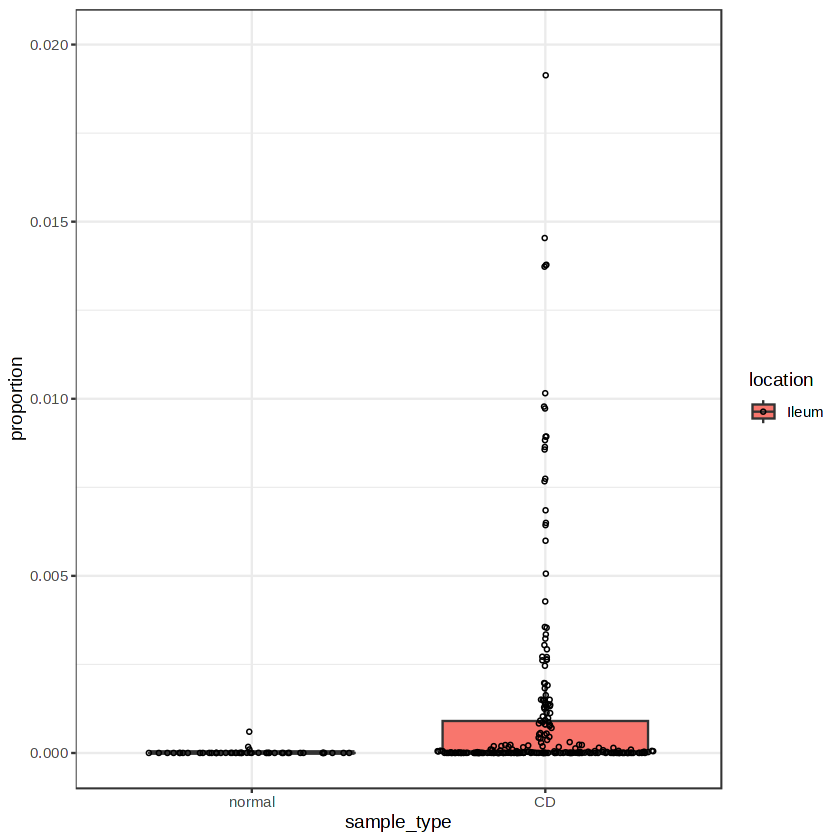

In [37]:
prop1_df2 <- prop3_df1[which(prop3_df1$variable == "Mucous_gland_neck"), ]
#prop1_df2 <- prop3_df1[which(prop3_df1$variable == "Epi MUC6+"), ]
ggplot(data=prop1_df2, aes(x=sample_type, y=proportion, fill=location))+
  geom_boxplot(aes(group=samp_loc), width=0.7, outlier.colour = "white", outlier.size = 0.5)+
  geom_quasirandom(method = "pseudorandom", dodge.width=0.8, size=0.8, shape=1, alpha=1) +
  #geom_text(x=1,y=0.3,label="Paneth")+
  #annotate("text",x=1,y=0.75,label = "VE ven",size=6)+
  #scale_fill_manual(values = c("#CDF2F9","#A6C6F8")) +
  #geom_boxplot(width=0.5,color="black",outlier.alpha = 0.4)+
  #geom_boxplot(notch=T, width=0.1, fill=NA, outlier.shape=NA, size=0.3) +
  #geom_point(aes(group=samp_loc),position=position_jitter(width = 0.1,height = 0),alpha=0.7,shape=19, color="grey60")+
  #geom_violin(width=2,color="black")+
  #geom_errorbar(data=bb, mapping = aes(x=tissue, y=mtb.median, ymin = mtb.median-mtb.sd, 
  #                                   ymax=mtb.median+mtb.sd),
  #            size=0.5, color="red",width=0)+
  #geom_point(data=bb,mapping =aes(x=tissue, y=mtb.median),
#           size=9,color="red",shape="_") +
coord_cartesian(ylim = c(0,0.02))+
theme_bw()

In [38]:
#save(bp.res, file="/lustre/scratch126/cellgen/team205/rl20/Gut/BayesPrism_out/E_CEOD_101794_modi_1_annot.rdata")

In [39]:
c1 <- prop1_df2$proportion[which(prop1_df2$sample_type == "normal")]
c2 <- prop1_df2$proportion[which(prop1_df2$sample_type == "CD")]
wilcox.test(c1, c2)


	Wilcoxon rank sum test with continuity correction

data:  c1 and c2
W = 2745, p-value = 2.234e-10
alternative hypothesis: true location shift is not equal to 0


#### GSE111889

In [62]:
#load("/lustre/scratch126/cellgen/team205/rl20/Gut/BayesPrism_out/GSE111889_modi_2_annot_disease_only.rdata")
load("/lustre/scratch126/cellgen/team205/rl20/Gut/BayesPrism_out/GSE111889_fine_grained_annot_disease_only_new_sc_ref_allgene.rdata")

In [63]:
# extract posterior mean of cell type fraction theta
theta <- get.fraction(bp=bp.res,
            which.theta="final",
            state.or.type="type")

head(theta)

,Trm_Th17,Trm/em_CD8,Tfh_naive,B_plasma_IgA1,TA,Enterocyte,ILC3,Treg_IL10,Goblet_progenitor,Monocyte,⋯,Glial_2,Neuroblast,Macrophage_LYVE1,DC_langerhans,Glial_1,Oesophagus_fibroblast,Immune_recruiting_pericyte,Rectum_fibroblast,EC_cycling,Erythrocytes
CSM5FZ1G,1.627444e-03,4.066849e-04,1.719580e-06,2.593419e-06,1.843793e-01,3.636201e-07,1.222800e-06,1.674547e-04,5.585009e-03,9.834988e-05,⋯,3.214394e-06,4.254831e-06,0.031505099,2.655257e-06,0.002488884,5.928195e-04,9.937329e-07,1.348504e-03,7.292498e-07,3.782923e-04
CSM5FZ1F,4.150192e-03,1.681201e-05,6.595855e-07,5.031709e-07,2.914717e-01,5.006352e-01,3.791420e-07,7.812226e-07,1.208347e-06,1.520078e-02,⋯,1.049539e-06,5.043566e-07,0.010336727,5.023753e-07,0.000361306,1.051597e-04,6.997854e-07,3.691052e-07,5.422121e-07,9.768928e-03
CSM5FZ1I,4.805889e-03,2.075211e-03,2.455971e-06,3.113708e-06,1.242995e-01,3.971861e-07,1.510655e-06,2.340214e-04,2.808236e-03,1.691754e-06,⋯,2.560178e-03,4.797320e-06,0.043600971,8.082160e-07,0.003033536,6.950657e-04,6.280888e-05,1.641886e-03,1.588777e-06,3.383464e-05
CSM5FZ1H,4.429511e-05,1.763460e-05,1.903198e-06,2.598169e-06,2.337116e-01,2.373166e-07,1.519669e-06,3.007062e-06,1.075248e-03,2.372965e-06,⋯,4.130246e-06,3.743021e-06,0.018322934,2.096848e-06,0.001696687,3.199651e-04,8.083621e-07,5.499820e-04,2.912137e-06,2.735419e-06
CSM5FZ1J,1.609626e-06,7.151375e-07,3.094040e-06,7.770656e-07,3.504160e-03,5.769034e-01,1.480390e-06,7.278500e-07,1.610923e-06,3.405262e-07,⋯,6.709284e-07,5.579440e-04,0.026955451,3.511957e-06,0.002232909,1.959388e-06,5.457270e-07,1.008989e-06,1.080379e-06,2.736709e-07
CSM5FZ1K,3.447209e-07,3.570359e-07,1.961633e-06,7.194109e-07,8.401769e-07,2.530347e-07,1.299041e-04,4.589945e-07,4.226286e-07,1.610878e-07,⋯,8.992185e-07,1.386136e-03,0.005641563,3.065552e-07,0.004206958,1.158856e-06,1.985369e-04,6.863912e-07,1.824017e-06,1.404880e-07


In [64]:
Bulk.eset1 <- readRDS('/home/jovyan/farm/Gut/Deconvolution/GSE111889_ExpressionSet.rds')

In [65]:
phenoData(Bulk.eset1)$location %>% table

.
Ascending (right-sided) colon                         Cecum 
                            8                             5 
Descending (left-sided) colon                         Ileum 
                            9                            88 
                 Non-inflamed                        Rectum 
                            1                            99 
                Sigmoid Colon                Terminal ileum 
                           22                             3 
             Transverse colon 
                           14 

In [66]:

prop1_df <- data.frame(theta, check.names=F)
prop1_df$sample_type <- phenoData(Bulk.eset1)$disease
prop1_df$location <- phenoData(Bulk.eset1)$location
prop1_df$location[which(prop1_df$location=='Ascending (right-sided) colon')] <- "Colon"
prop1_df$location[which(prop1_df$location=='Descending (left-sided) colon')] <- "Colon"
prop1_df$location[which(prop1_df$location=='Sigmoid Colon')] <- "Colon"
prop1_df$location[which(prop1_df$location=='Transverse colon')] <- "Colon"
prop1_df$location[which(prop1_df$location=='Terminal ileum')] <- "Ileum"

prop1_df <- prop1_df[which(prop1_df$location == "Ileum" |
                           prop1_df$location == "Colon" |
                           prop1_df$location == "Rectum"), ]

prop1_df$sample_type[which(prop1_df$sample_type=='Non-IBD')] <- 'normal'
#prop1_df$location[which(prop1_df$location=='Sigmoid Colon')] <- 'Colon'
#prop1_df$location <- factor(prop1_df$location, levels = c("Ileum", "Colon", "Rectum"))
prop1_df$samp_loc <- paste(prop1_df$sample_type, prop1_df$location, sep="_")
#prop1_df$samp_loc <- factor(prop1_df$samp_loc, levels = c("normal_Ileum", "normal_Colon", "normal_Rectum",
#                                                          "CD_Ileum", "CD_Colon", "CD_Rectum",
#                                                          "UC_Ileum", "UC_Colon", "UC_Rectum"))
prop1_df$sample_type <- factor(prop1_df$sample_type, levels = c("normal", "CD", "UC"))

prop1_df$sample_id <- rownames(prop1_df)

prop1_df1 <-  melt(prop1_df,value.name = "proportion")

Using sample_type, location, samp_loc, sample_id as id variables



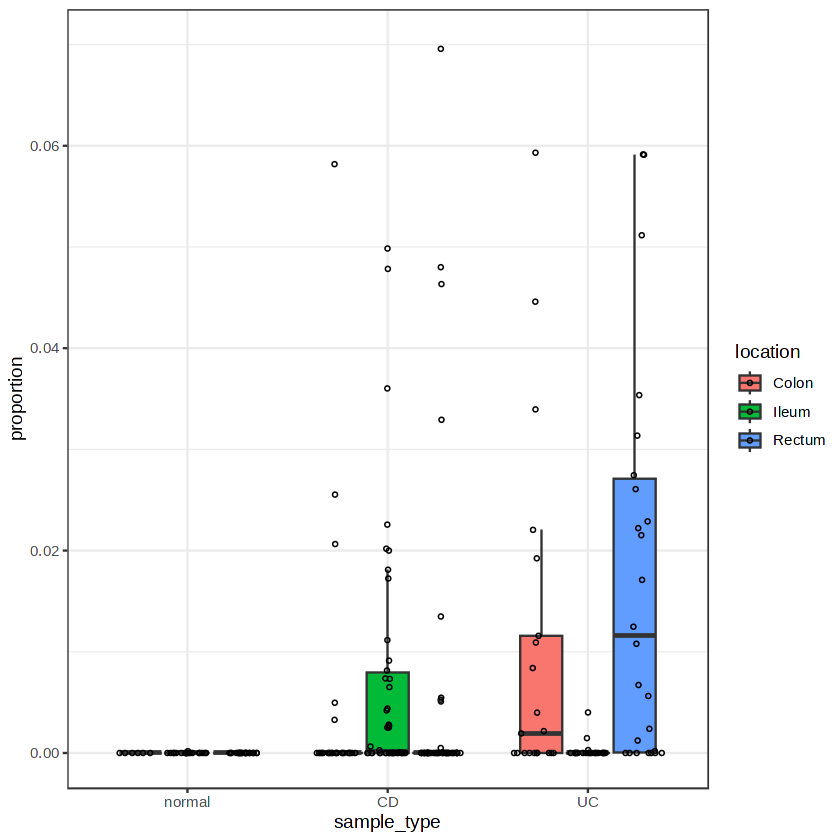

In [67]:
prop1_df2 <- prop1_df1[which(prop1_df1$variable == "Mucous_gland_neck"), ]
#prop1_df2 <- prop1_df1[which(prop1_df1$variable == "Epi MUC6+"), ]
ggplot(data=prop1_df2, aes(x=sample_type, y=proportion, fill=location))+
  geom_boxplot(aes(group=samp_loc), width=0.7, outlier.colour = "white", outlier.size = 0.5)+
  geom_quasirandom(method = "pseudorandom", dodge.width=0.8, size=0.8, shape=1, alpha=1) +
  #geom_text(x=1,y=0.3,label="Paneth")+
  #annotate("text",x=1,y=0.75,label = "VE ven",size=6)+
  #scale_fill_manual(values = c("#CDF2F9","#A6C6F8")) +
  #geom_boxplot(width=0.5,color="black",outlier.alpha = 0.4)+
  #geom_boxplot(notch=T, width=0.1, fill=NA, outlier.shape=NA, size=0.3) +
  #geom_point(aes(group=samp_loc),position=position_jitter(width = 0.1,height = 0),alpha=0.7,shape=19, color="grey60")+
  #geom_violin(width=2,color="black")+
  #geom_errorbar(data=bb, mapping = aes(x=tissue, y=mtb.median, ymin = mtb.median-mtb.sd, 
  #                                   ymax=mtb.median+mtb.sd),
  #            size=0.5, color="red",width=0)+
  #geom_point(data=bb,mapping =aes(x=tissue, y=mtb.median),
#           size=9,color="red",shape="_") +
coord_cartesian(ylim = c(0,0.07))+
theme_bw()

In [29]:
#save(bp.res, file="/lustre/scratch126/cellgen/team205/rl20/Gut/BayesPrism_out/GSE111889_modi_2_annot_disease_only.rdata")

In [48]:
c1 <- prop1_df2$proportion[which(prop1_df2$sample_type == "normal" & prop1_df2$location == "Colon")]
c2 <- prop1_df2$proportion[which(prop1_df2$sample_type == "UC" & prop1_df2$location == "Rectum")]
wilcox.test(c1, c2)


	Wilcoxon rank sum exact test

data:  c1 and c2
W = 17, p-value = 0.001759
alternative hypothesis: true location shift is not equal to 0


#### TCGA

In [49]:
load("/lustre/scratch126/cellgen/team205/rl20/Gut/BayesPrism_out/COAD_TCGA_fine_grained_annot_disease_only_new_sc_ref.rdata")

In [50]:
# extract posterior mean of cell type fraction theta
theta <- get.fraction(bp=bp.res,
            which.theta="final",
            state.or.type="type")

head(theta)

,Trm_Th17,Trm/em_CD8,Tfh_naive,B_plasma_IgA1,TA,Enterocyte,ILC3,Treg_IL10,Goblet_progenitor,Monocyte,⋯,Glial_2,Neuroblast,Macrophage_LYVE1,DC_langerhans,Glial_1,Oesophagus_fibroblast,Immune_recruiting_pericyte,Rectum_fibroblast,EC_cycling,Erythrocytes
TCGA-AA-3693-01A-01R-0905-07,1.435445e-05,1.554849e-06,3.171311e-06,4.500764e-02,0.2819334135,9.026700e-07,7.251009e-03,2.633708e-06,4.956813e-07,2.494651e-04,⋯,1.086544e-06,1.736949e-03,0.010789908,7.873602e-06,7.698234e-03,2.923298e-03,9.310193e-03,0.007385066,2.456522e-02,4.924837e-07
TCGA-A6-6781-01A-22R-1928-07,1.221534e-06,1.034643e-05,8.183599e-07,2.935226e-07,0.0001067251,6.313160e-07,2.580106e-07,1.079747e-06,7.303972e-02,1.326857e-03,⋯,5.850877e-07,6.297997e-07,0.025836840,1.014589e-06,6.433494e-07,2.257450e-07,4.797034e-07,0.236074651,6.503244e-07,2.585663e-03
TCGA-AA-3506-01A-01R-1410-07,3.499737e-06,5.418976e-06,1.942740e-06,2.973435e-06,0.1312234532,3.626561e-02,1.383867e-06,4.051983e-06,3.582307e-06,1.619489e-06,⋯,5.787322e-06,3.287507e-06,0.014213632,4.204346e-06,5.504336e-06,2.777135e-03,8.392303e-03,0.031266971,1.164234e-02,2.992609e-06
TCGA-AM-5821-01A-01R-1653-07,1.040030e-06,1.062494e-06,6.250355e-07,7.533772e-07,0.2546529031,2.791597e-07,1.761527e-03,5.213663e-07,3.578689e-07,3.349379e-03,⋯,9.643924e-07,4.727550e-07,0.008409247,6.687387e-07,7.751780e-03,2.870954e-03,3.024519e-06,0.020063762,3.893116e-03,2.373931e-06
TCGA-DM-A1D8-01A-11R-A155-07,4.111090e-06,1.057101e-04,1.913291e-06,5.196412e-07,0.4631376589,3.366671e-07,3.380944e-03,5.908740e-06,3.956282e-07,1.751115e-04,⋯,3.428854e-05,5.337522e-03,0.007051821,9.068872e-06,3.639890e-03,3.256851e-03,2.104244e-02,0.026877101,1.689168e-02,2.620833e-07
TCGA-F4-6460-01A-11R-1774-07,1.757366e-06,8.289411e-07,3.550378e-06,1.685059e-02,0.2185906964,1.490103e-05,1.860173e-06,2.885824e-06,5.034926e-06,1.348275e-06,⋯,3.792181e-03,1.234671e-04,0.013505035,4.605809e-04,2.234586e-03,6.846928e-07,5.342256e-06,0.080229261,9.626627e-03,5.908200e-07


In [51]:
library(tidyverse)
library(ggbeeswarm)
library(ggplot2)
library(reshape2)
library(SingleCellExperiment)

In [52]:
Bulk.eset <- readRDS('/home/jovyan/farm/Gut/Deconvolution/COAD_TCGAbiolinks_ExpressionSet.rds')

prop1_df <- data.frame(theta, check.names=F)

prop1_df$sample_type <- phenoData(Bulk.eset)$sample_type
prop1_df$sample_id <- rownames(prop1_df)
prop1_df$sample_type[which(prop1_df$sample_type=="Solid Tissue Normal")] <- "Normal"
prop1_df$sample_type[which(prop1_df$sample_type!="Normal")] <- "Tumour"
prop1_df$MSI <- phenoData(Bulk.eset)$MSI_status
#prop1_df$MSI[which(prop1_df$MSI =="MSI-H" )] <- "MSI"
#prop1_df1 <- prop1_df %>% gather(key=c('cell_type','sample_type','sample_id'), value='proportion', 1:(ncol(prop1_df)-2))
prop1_df1 <-  melt(prop1_df,value.name = "proportion")

Using sample_type, sample_id, MSI as id variables



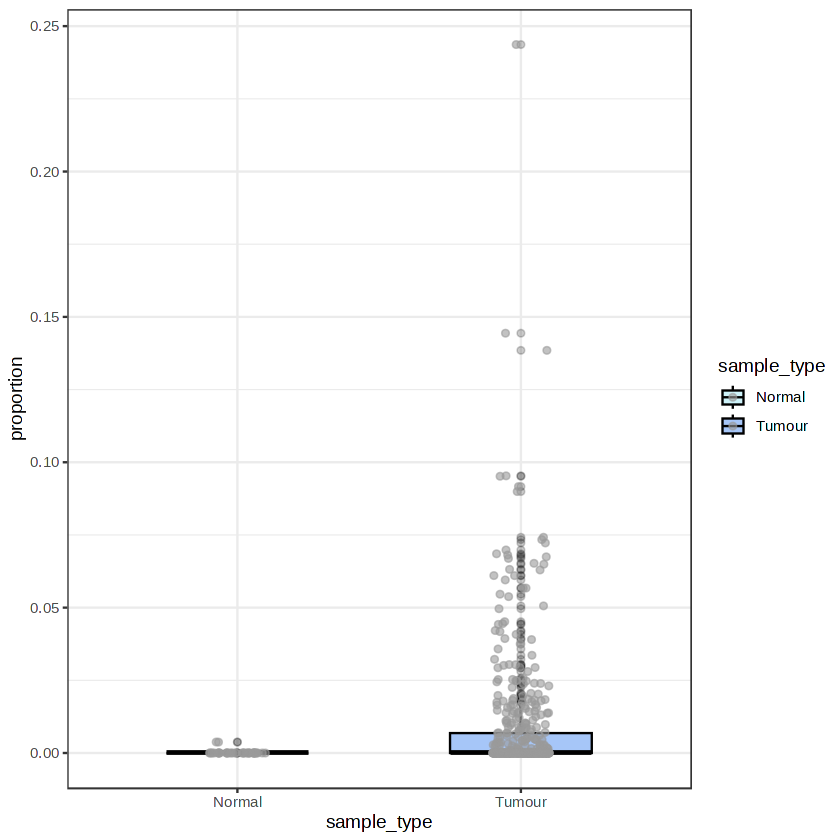

In [53]:
#prop1_df2 <- prop1_df1[which(prop1_df1$variable == "Epi MUC6+"), ]
prop1_df2 <- prop1_df1[which(prop1_df1$variable == "Mucous_gland_neck"), ]
ggplot(data=prop1_df2, aes(x=sample_type, y=proportion, fill=sample_type))+
  scale_fill_manual(values = c("#CDF2F9","#A6C6F8")) +
  geom_boxplot(width=0.5,color="black",outlier.alpha = 0.2)+
  geom_point(position=position_jitter(width = 0.1,height = 0),alpha=0.6,shape=19, color="grey60")+
  theme_bw()

Warning message:
“Duplicated aesthetics after name standardisation: shape”


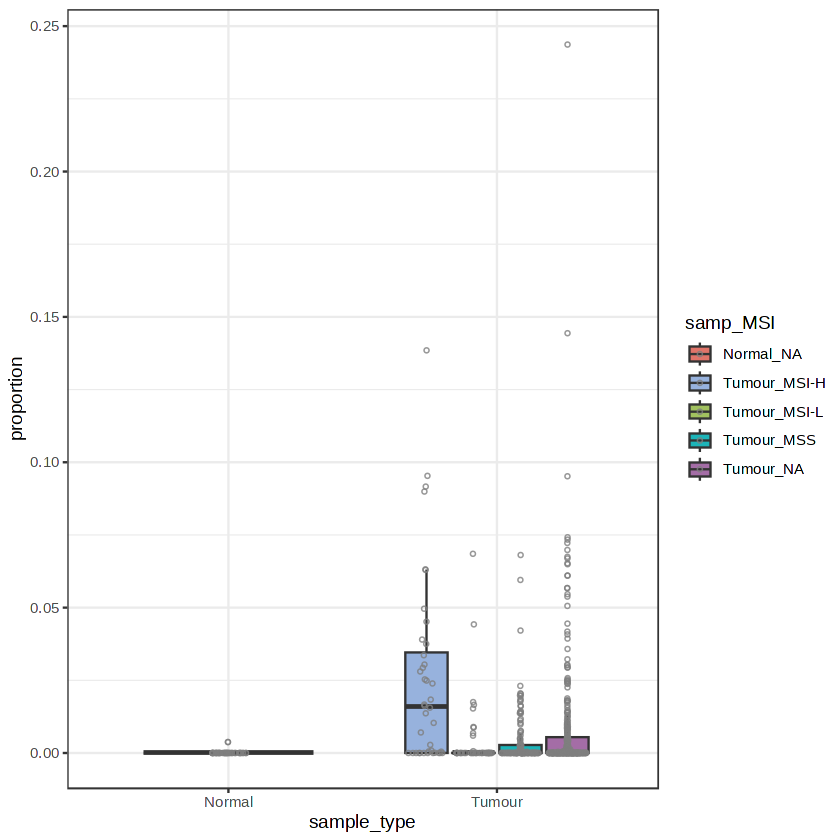

In [54]:
prop1_df2$samp_MSI <- paste(prop1_df2$sample_type, prop1_df2$MSI, sep = "_")
#prop1_df2[which(is.na(prop1_df2$MSI)),'MSI'] <- 'No_record'
ggplot(data=prop1_df2, aes(x=sample_type, y=proportion, fill=samp_MSI))+
  geom_boxplot(aes(group=samp_MSI), width=0.7, outlier.colour = "white", outlier.size = 0.5)+
  geom_quasirandom(method = "pseudorandom", dodge.width=0.7, size=0.8, shape=1, alpha=0.8, shape=19, color = 'grey50') +
  #geom_point(position=position_jitter(width = 0.15,height = 0),alpha=0.8,shape=19, color = 'grey60', size = 1)+
  scale_fill_manual(values = c("#E07469","#97B2DD", "#A1C15F","#1CB4B8","#A46DA6")) +
  #geom_boxplot(width=0.5,color="black",outlier.alpha = 0.4)+
  #geom_boxplot(notch=T, width=0.1, fill=NA, outlier.shape=NA, size=0.3) +
  #geom_point(aes(group=samp_loc),position=position_jitter(width = 0.1,height = 0),alpha=0.7,shape=19, color="grey60")+
  #geom_violin(width=2,color="black")+
  #coord_cartesian(ylim = c(0,0.015))+
theme_bw()


In [60]:
#c1 <- prop1_df2$proportion[which(prop1_df2$samp_MSI == "Normal_NA")]
c1 <- prop1_df2$proportion[which(prop1_df2$samp_MSI == "Tumour_MSI-H")]
c2 <- prop1_df2$proportion[which(prop1_df2$samp_MSI == "Tumour_MSS")]
wilcox.test(c1, c2)


	Wilcoxon rank sum test with continuity correction

data:  c1 and c2
W = 3832, p-value = 7.343e-07
alternative hypothesis: true location shift is not equal to 0
